In [33]:
import numpy as np
import pandas as pd

from sklearn import linear_model
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
iris = load_iris()

In [3]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [4]:
df_iris = pd.DataFrame(iris.data, columns=iris.feature_names)
df_target = pd.DataFrame(iris.target, columns=['class'])

In [5]:
df_total = pd.concat([df_iris, df_target], axis=1)
classes = dict(zip(range(0,3), iris.target_names))
df_total['class'] = df_total['class'].apply(lambda num: classes[num])

In [43]:
classes

{0: 'setosa', 1: 'versicolor', 2: 'virginica'}

In [6]:
df_total.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

    class  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa

# EDA 

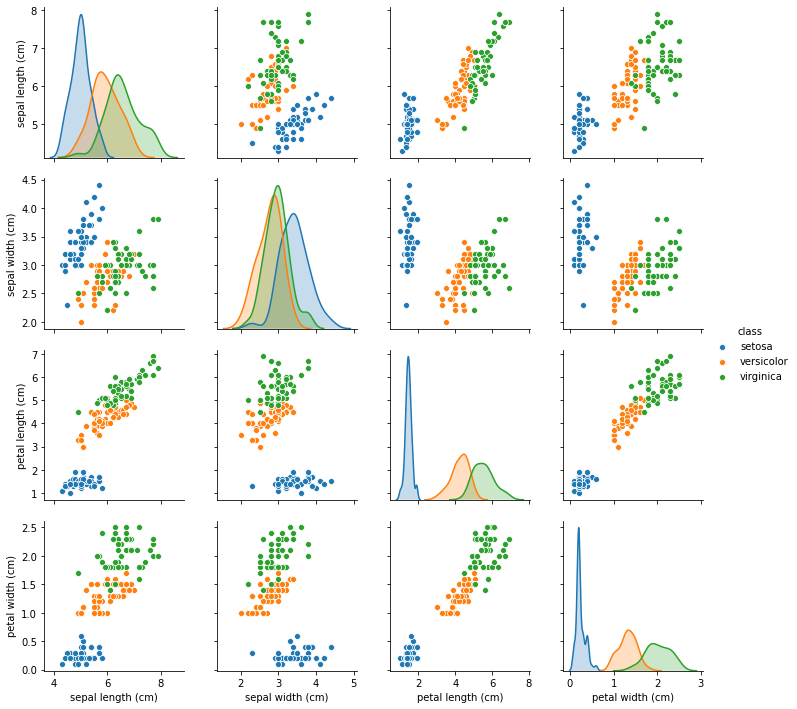

In [7]:
sns.pairplot(df_total, hue='class')

# Análisis predictivo

In [8]:
scaler = StandardScaler()
X = scaler.fit_transform(df_iris)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, df_target, test_size=0.3, random_state=53)

In [10]:
kf = KFold(n_splits=5, shuffle=True, random_state=12)
scores = []
for i in range(1,21):
    model = KNeighborsClassifier(n_neighbors=i)
    score = cross_val_score(model, X_train, y_train.values.ravel(), cv=kf)
    scores.append({
        'n_neighbors': i,
        'mean_score': np.mean(score),
        'std_score': np.std(score)
    })
scores = pd.DataFrame(scores)
scores.sort_values(by=['mean_score', 'std_score'], ascending=[False, True]).head(5)

n_neighbors  mean_score  std_score
13           14    0.971429   0.023328
7             8    0.971429   0.038095
9            10    0.971429   0.038095
11           12    0.971429   0.038095
0             1    0.961905   0.035635

Accuracy del modelo: 0.9555555555555556


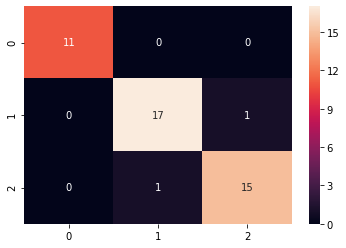

In [11]:
best_k = 14
best_model = KNeighborsClassifier(n_neighbors=best_k)
best_model.fit(X_train, y_train.values.ravel())
y_pred = best_model.predict(X_test)
print(f'Accuracy del modelo: {accuracy_score(y_test, y_pred)}')


sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)
plt.show()

In [12]:
accuracy_score(y_test, y_pred)

0.9555555555555556

La clasificación con KNN ya es muy buena tanto en train como test.

In [13]:
log_reg = linear_model.LogisticRegression()
log_reg.fit(X_train, y_train.values.ravel())

C:\Users\joaqu\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\joaqu\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

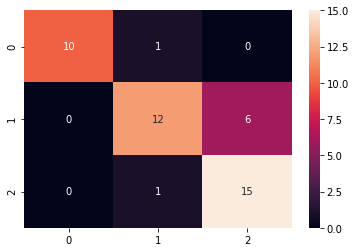

In [14]:
log_reg_pred = log_reg.predict(X_test)

sns.heatmap(confusion_matrix(y_test, log_reg_pred), annot=True)
plt.show()

In [15]:
print(accuracy_score(y_test, log_reg_pred))

0.8222222222222222


Regresión logística anduvo bastante peor. ¿Por qué?

Quizás tiene que ver con que se está intentando resolver un caso de clasificación multi-clase, y regresión logística funciona mejor para casos de clasificación binaria. Odio un poco los modelos lineales, pero este punto sería un buen momento para aprender a evaluar bien este tipo de modelos y entender por qué da un accuracy bajo.

# Árbol de clasificación

In [18]:
treeclf = DecisionTreeClassifier(random_state=1)
treeclf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=1, splitter='best')

In [21]:
preds = treeclf.predict(X_train)
print(accuracy_score(y_train, preds))

yt_pred = treeclf.predict(X_test)
print(accuracy_score(y_test, yt_pred))

1.0
0.9333333333333333


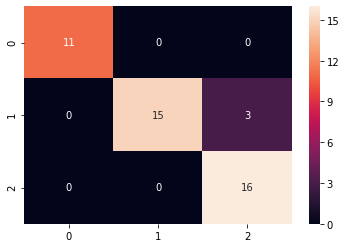

In [22]:
sns.heatmap(confusion_matrix(y_test, yt_pred), annot=True)
plt.show()

In [32]:
df_importances = pd.DataFrame({
    'features': df_iris.columns, 
    'importances':treeclf.feature_importances_
})
df_importances.sort_values(by='importances', ascending=False)

features  importances
3   petal width (cm)     0.919557
2  petal length (cm)     0.052666
0  sepal length (cm)     0.027777
1   sepal width (cm)     0.000000

In [37]:
params = {
    'max_depth': [1,2,3,4,5],
    'max_features': [1,2,3,4],
    'max_leaf_nodes': [5,6,7,8,9,10],
    'min_samples_leaf': [1,2,3,4],
    'min_samples_split': [2,3,4]
}
treeclf = DecisionTreeClassifier()
cv = KFold(n_splits=5, shuffle=True, random_state=1)
gs = GridSearchCV(treeclf, params, cv=cv, verbose=1, n_jobs=3)
gs.fit(X_train, y_train)

Fitting 5 folds for each of 1440 candidates, totalling 7200 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done 185 tasks      | elapsed:    1.8s
[Parallel(n_jobs=3)]: Done 7200 out of 7200 | elapsed:    9.2s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=1, shuffle=True),
             error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=3,
             param_grid={'max_depth': [1, 2, 3, 4, 5],
                         

In [40]:
treeclf_cv = gs.best_estimator_
treeclf_cv.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=2, max_leaf_nodes=6,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [47]:
classes.values()

dict_values(['setosa', 'versicolor', 'virginica'])

In [53]:
yt_pred = treeclf_cv.predict(X_test)
fig, ax = plt.subplots(figsize=(10,5))
sns.heatmap(
    confusion_matrix(y_test, yt_pred), 
    annot=True,
    xticklabels = ['pred_'+c for c in classes.values()],
    yticklabels = classes.values()
)
plt.title('Matriz de confusión para árbol de classificación tuneado')
plt.show()

## Conclusión

El árbol de clasificación no supera la performance de KNN, ni siquiera cuando tuneo los hiperparámetros con un gridsearch. De todos modos es interesante que, en ambos casos, las muestras problemáticas son versicolor que se predicen como virginica. Más allá de los resultados del modelo, esto da la información de que virginica y versicolor deben ser bastante similares